In [56]:
import numpy as np
import pandas as pd
import nltk 
import matplotlib.pyplot as plt 
import seaborn as sns
%cd C:\\Users\\kanika2\\12AprilBatch\\Final Project\\6. Analyzing online Job Postings

C:\Users\kanika2\12AprilBatch\Final Project\6. Analyzing online Job Postings


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

In [140]:
from scipy import sparse
import scipy.stats as ss

In [198]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher

In [231]:
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

In [197]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [3]:
jobPostingDF = pd.read_csv('data job posts.csv')

In [4]:
jobPostingDF.head(2)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False


#### Data Exploratory¶

In [6]:
jobPostingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [7]:
jobPostingDF.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

#### Data Selection

In [8]:
# Useful columns from datasets
jobPostingDF=jobPostingDF[['jobpost', 'Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC','Year', 'Month', 'IT']]

In [41]:
# Treating missing values
jobPostingDF[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']]=jobPostingDF[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].fillna(jobPostingDF[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].mode().iloc[0])

In [44]:
jobPostingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         19001 non-null  object
 1   Title           19001 non-null  object
 2   Company         19001 non-null  object
 3   JobDescription  19001 non-null  object
 4   JobRequirment   19001 non-null  object
 5   RequiredQual    19001 non-null  object
 6   AboutC          19001 non-null  object
 7   Year            19001 non-null  int64 
 8   Month           19001 non-null  int64 
 9   IT              19001 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 1.3+ MB


In [47]:
len(jobPostingDF['Title'].value_counts()[:21].keys().to_list())

21

In [52]:
job_post = jobPostingDF

In [53]:
# Number of job posts by titles
classes = job_post['Title'].value_counts()[:21]
keys = classes.keys().to_list()

job_post = job_post[job_post['Title'].isin(keys)]
job_post['Title'].value_counts()

Accountant                                356
Chief Accountant                          219
Medical Representative                    216
Sales Manager                             166
Administrative Assistant                  155
Lawyer                                    151
Software Developer                        134
Project Manager                           117
English Language Courses                  109
Web Developer                             101
Java Developer                             88
Marketing Specialist                       87
Office Manager                             85
Receptionist/ Administrative Assistant     77
Graphic Designer                           75
System Administrator                       75
Marketing Manager                          72
Senior Java Developer                      69
Software Engineer                          69
QA Engineer                                66
PHP Developer                              65
Name: Title, dtype: int64

#### Job Posting by Year

In [54]:
y=pd.DataFrame(job_post.Year.value_counts().reset_index())
y['Job Posts']=y.Year
y['Year']=y['index']
y.drop('index',axis=1,inplace=True)
y.sort_values(by='Year',inplace=True)
y

,Year,Job Posts
11,2004,84
10,2005,154
8,2006,178
5,2007,229
4,2008,245
9,2009,163
7,2010,210
6,2011,216
1,2012,274
2,2013,267


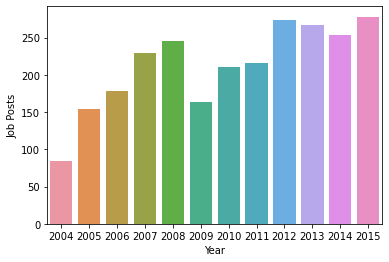

In [57]:
sns.barplot(x='Year',y='Job Posts',data=y)
plt.show()

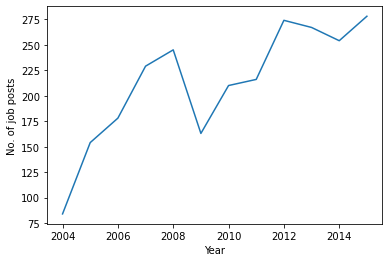

In [58]:
plt.plot('Year','Job Posts',data=y)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()

#### Job Posting by Month

In [59]:
m=pd.DataFrame(job_post.Month.value_counts().reset_index())
m['Job Posts']=m.Month
m['Month']=m['index']
m.drop('index',axis=1,inplace=True)
m.sort_values(by='Month',inplace=True)
m

,Month,Job Posts
9,1,201
0,2,232
1,3,231
10,4,201
7,5,209
6,6,210
4,7,212
5,8,211
2,9,229
3,10,225


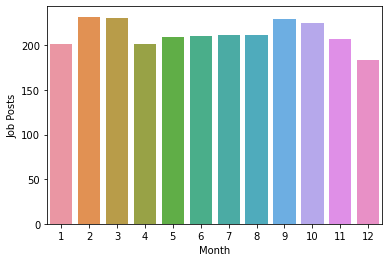

In [60]:
sns.barplot(x='Month',y='Job Posts',data=m)
plt.show()

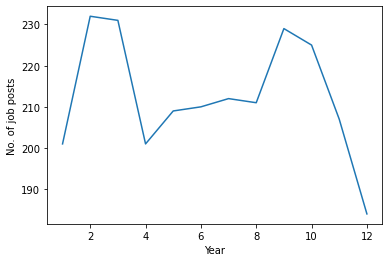

In [61]:
plt.plot('Month','Job Posts',data=m)
plt.xlabel('Year')
plt.ylabel('No. of job posts')
plt.show()

#### Top job posts every Year(2004-2015)

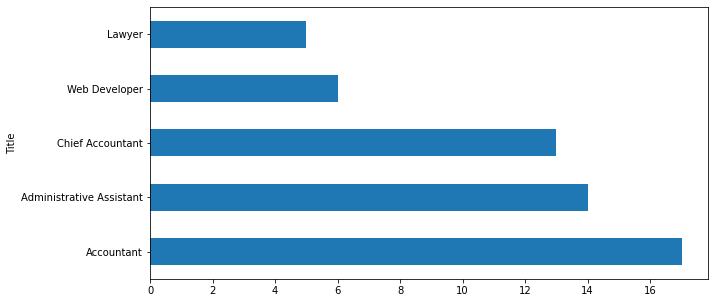

In [64]:
#2004
yr_1=job_post[job_post.Year==2004].groupby('Title').count().sort_values('jobpost',ascending=False).head(5)
plt.figure(figsize=(10, 5))
yr_1.jobpost.plot(kind = 'barh')
plt.show()

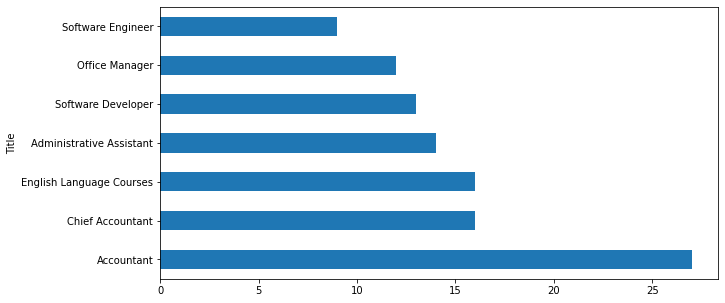

In [65]:
#2005
yr_2=job_post[job_post.Year==2005].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

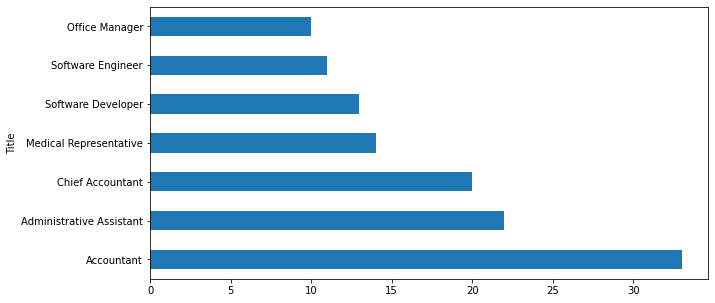

In [66]:
#2006
yr_2=job_post[job_post.Year==2006].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

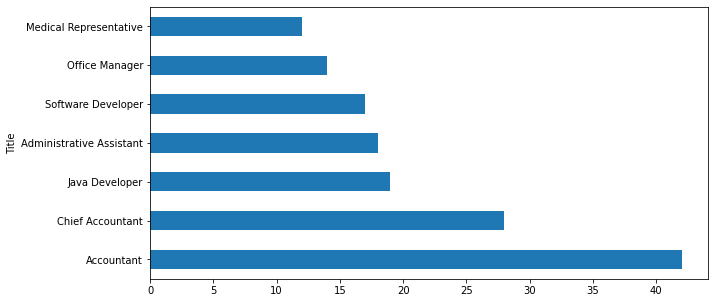

In [69]:
#2007
yr_2=job_post[job_post.Year==2007].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

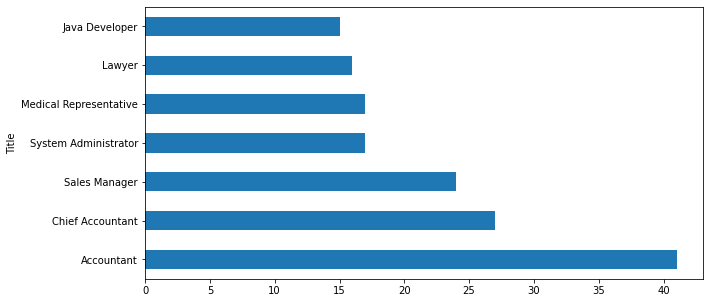

In [70]:
#2008
yr_2=job_post[job_post.Year==2008].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

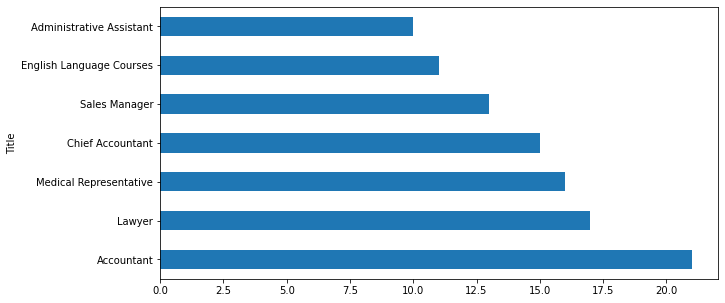

In [71]:
#2009
yr_2=job_post[job_post.Year==2009].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

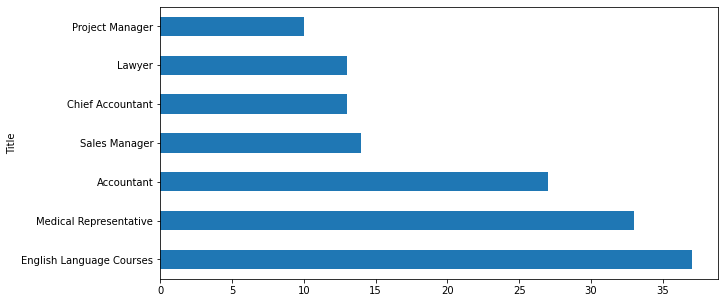

In [72]:
#2010
yr_2=job_post[job_post.Year==2010].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

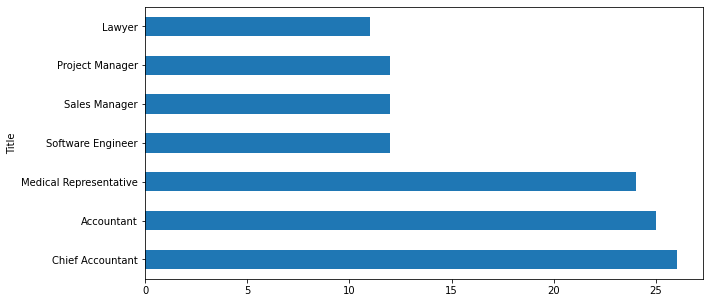

In [73]:
#2011
yr_2=job_post[job_post.Year==2011].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

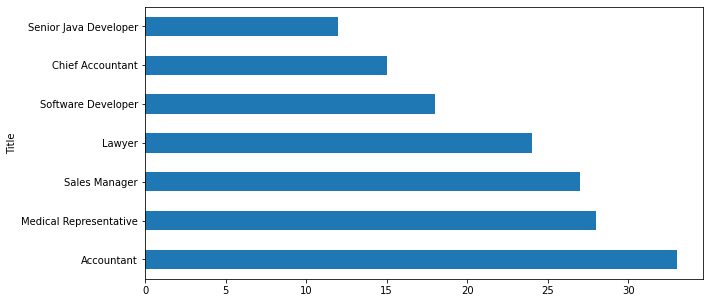

In [74]:
#2012
yr_2=job_post[job_post.Year==2012].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

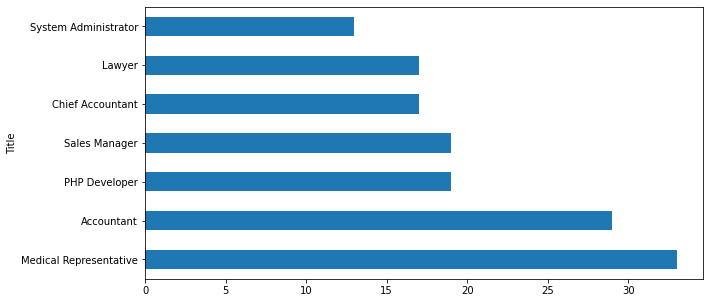

In [75]:
#2013
yr_2=job_post[job_post.Year==2013].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

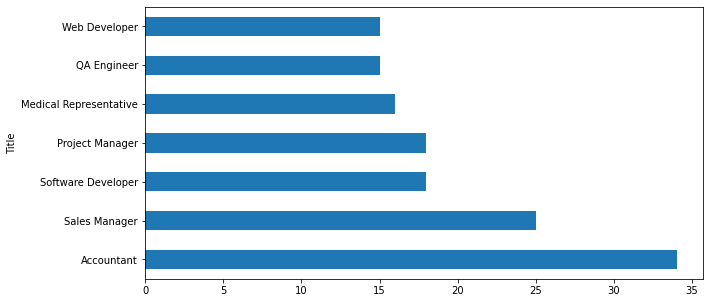

In [76]:
#2014
yr_2=job_post[job_post.Year==2014].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

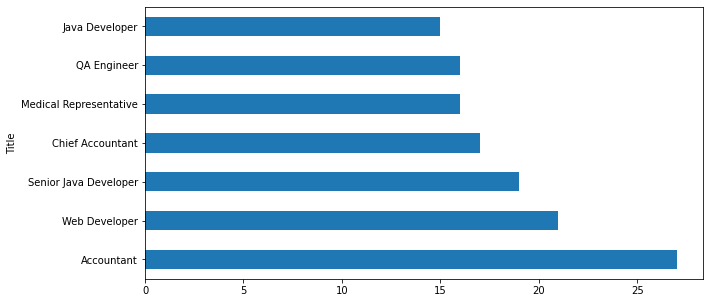

In [77]:
#2015
yr_2=job_post[job_post.Year==2015].groupby('Title').count().sort_values('jobpost',ascending=False).head(7)
plt.figure(figsize=(10, 5))
yr_2.jobpost.plot(kind ='barh')
plt.show()

#### Job Post by Company

In [78]:
c=pd.DataFrame(job_post.Company.value_counts().reset_index())
c['Job Posts']=c.Company
c['Company']=c['index']
c.drop('index',axis=1,inplace=True)
c.sort_values(by='Job Posts',inplace=True,ascending=False)
c.head(10)

,Company,Job Posts
0,Career Center NGO,178
1,SAS Group LLC,25
2,Virtual Solution Global Services LLC,23
3,ArmenTel CJSC,23
4,Boomerang Software LLC,21
5,IUNetworks LLC,17
6,Joomag AM LLC,15
7,Energize Global Services CJSC,14
8,BetArchitect LLC,14
9,"EPAM Systems, Inc.",14


In [79]:
y=pd.DataFrame(job_post.Year.value_counts().reset_index())
y['Title']=y.Year
y['Year']=y['index']
y.drop('index',axis=1,inplace=True)
y.sort_values(by='Year',inplace=True)
y

,Year,Title
11,2004,84
10,2005,154
8,2006,178
5,2007,229
4,2008,245
9,2009,163
7,2010,210
6,2011,216
1,2012,274
2,2013,267


#### Supervised Learning

In [80]:
df=job_post[['RequiredQual','IT']]

#### Basic Exploratory Analysis

In [81]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron')) 


#### Calculating Sentiment analysis using Textblob module

In [83]:
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud 

In [84]:
df['sentiment'] = df["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [85]:
df.IT.value_counts()

False    1951
True      601
Name: IT, dtype: int64

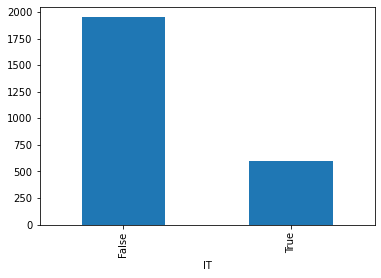

In [87]:
df.groupby('IT')['RequiredQual'].count().plot(kind = 'bar')
plt.show()

In [88]:
# convert label to a numeric variable
df['IT'] = np.where(df.IT==False,0,1)

#### Split the data into train & Test¶

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# train features and labels 
y = df['IT']
X = df['RequiredQual']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2169,)
(383,)
(2169,)
(383,)


#### Creating user defined functions for clean the text and pre-process the data

In [100]:
import re

In [99]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [94]:
stop = set(nltk.corpus.stopwords.words('english'))

In [97]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)     #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
   # text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
   # text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [101]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [102]:
X_train=pre_process(X_train)
X_test =pre_process(X_test)

#### Vectorization (count, tfidf) for both train & test

In [116]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble

In [109]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [110]:
xtrain_count

<2169x14019 sparse matrix of type '<class 'numpy.int64'>'
	with 140384 stored elements in Compressed Sparse Row format>

#### View the document term metrics

In [111]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [112]:
dtm2.head(10)

,a engineer,a engineer experience,a engineer role,a engineer software,a process,a process methodology,a role,a role ideally,a self,a self process,...,year successful formal,year supervisor,year supervisor responsibility,year upper,year upper management,year work,year work experience,year work least,year working,year working experience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(2, 3),max_df=0.9,min_df=0.001)
tfidf_vect_ngram.fit(df['RequiredQual'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [114]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(2,3), max_df=0.9,min_df=0.001)
tfidf_vect_ngram_chars.fit(df['RequiredQual'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

#### Topic Modeling

In [117]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=15, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [118]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['illustration morel draw relevant computer skill illustration morel relevant computer well organized personality adore illustration morel armenian software accounting work experience graphic accounting equivalent accounting tax practice',
 'degree medicine university degree medicine medicine pharmacy degree medicine pharmacy university degree russian language knowledge experience pharmaceutical would beneficial pharmaceutical industry experience pharmaceutical industry',
 'economics accounting degree economics accounting armenian accounting standard knowledge generally accepted knowledge generally standard least generally accepted accountant knowledge accounting standard least standard least year',
 'software development excellent knowledge finance related field knowledge c finance related algorithm data multiple task algorithm data structure writing reading development cycle',
 'computer science good knowledge degree computer degree computer science least year work experience science

#### Online Job Data-Word Clouds

In [120]:
frequency_words_wo_stop= {}
for data in df['RequiredQual']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [121]:
frequency_words_wo_stop

{'-': 22623,
 'university': 794,
 'degree': 1410,
 ';': 17205,
 'economical': 6,
 'background': 126,
 'plus': 1352,
 'excellent': 2131,
 'knowledge': 5513,
 'windows': 181,
 '2000': 14,
 'server': 303,
 ',': 10113,
 'networking': 69,
 'tcp': 26,
 '/': 1436,
 'ip': 40,
 'technologies': 327,
 'ms': 915,
 'sql': 337,
 'visual': 34,
 'basic': 349,
 '6': 25,
 'least': 1187,
 '2': 569,
 'years': 1466,
 'experience': 3980,
 'database': 202,
 'software': 879,
 'development': 756,
 'good': 2047,
 'english': 2123,
 '.': 3248,
 'remuneration': 3,
 ':': 716,
 'commensurate': 5,
 'norms': 14,
 'accepted': 39,
 'company': 134,
 'gd': 1,
 'creative': 119,
 'innovative': 24,
 'great': 11,
 'capacity': 37,
 'implement': 19,
 'stylish': 1,
 'ideas': 32,
 'open': 242,
 'new': 116,
 'trends': 5,
 'fine': 5,
 'arts': 5,
 'extensive': 48,
 'graphic': 69,
 'design': 376,
 'marketing': 381,
 'communications': 79,
 'tools': 218,
 'required': 80,
 'well': 288,
 'thorough': 34,
 'adobe': 130,
 'photoshop': 111,


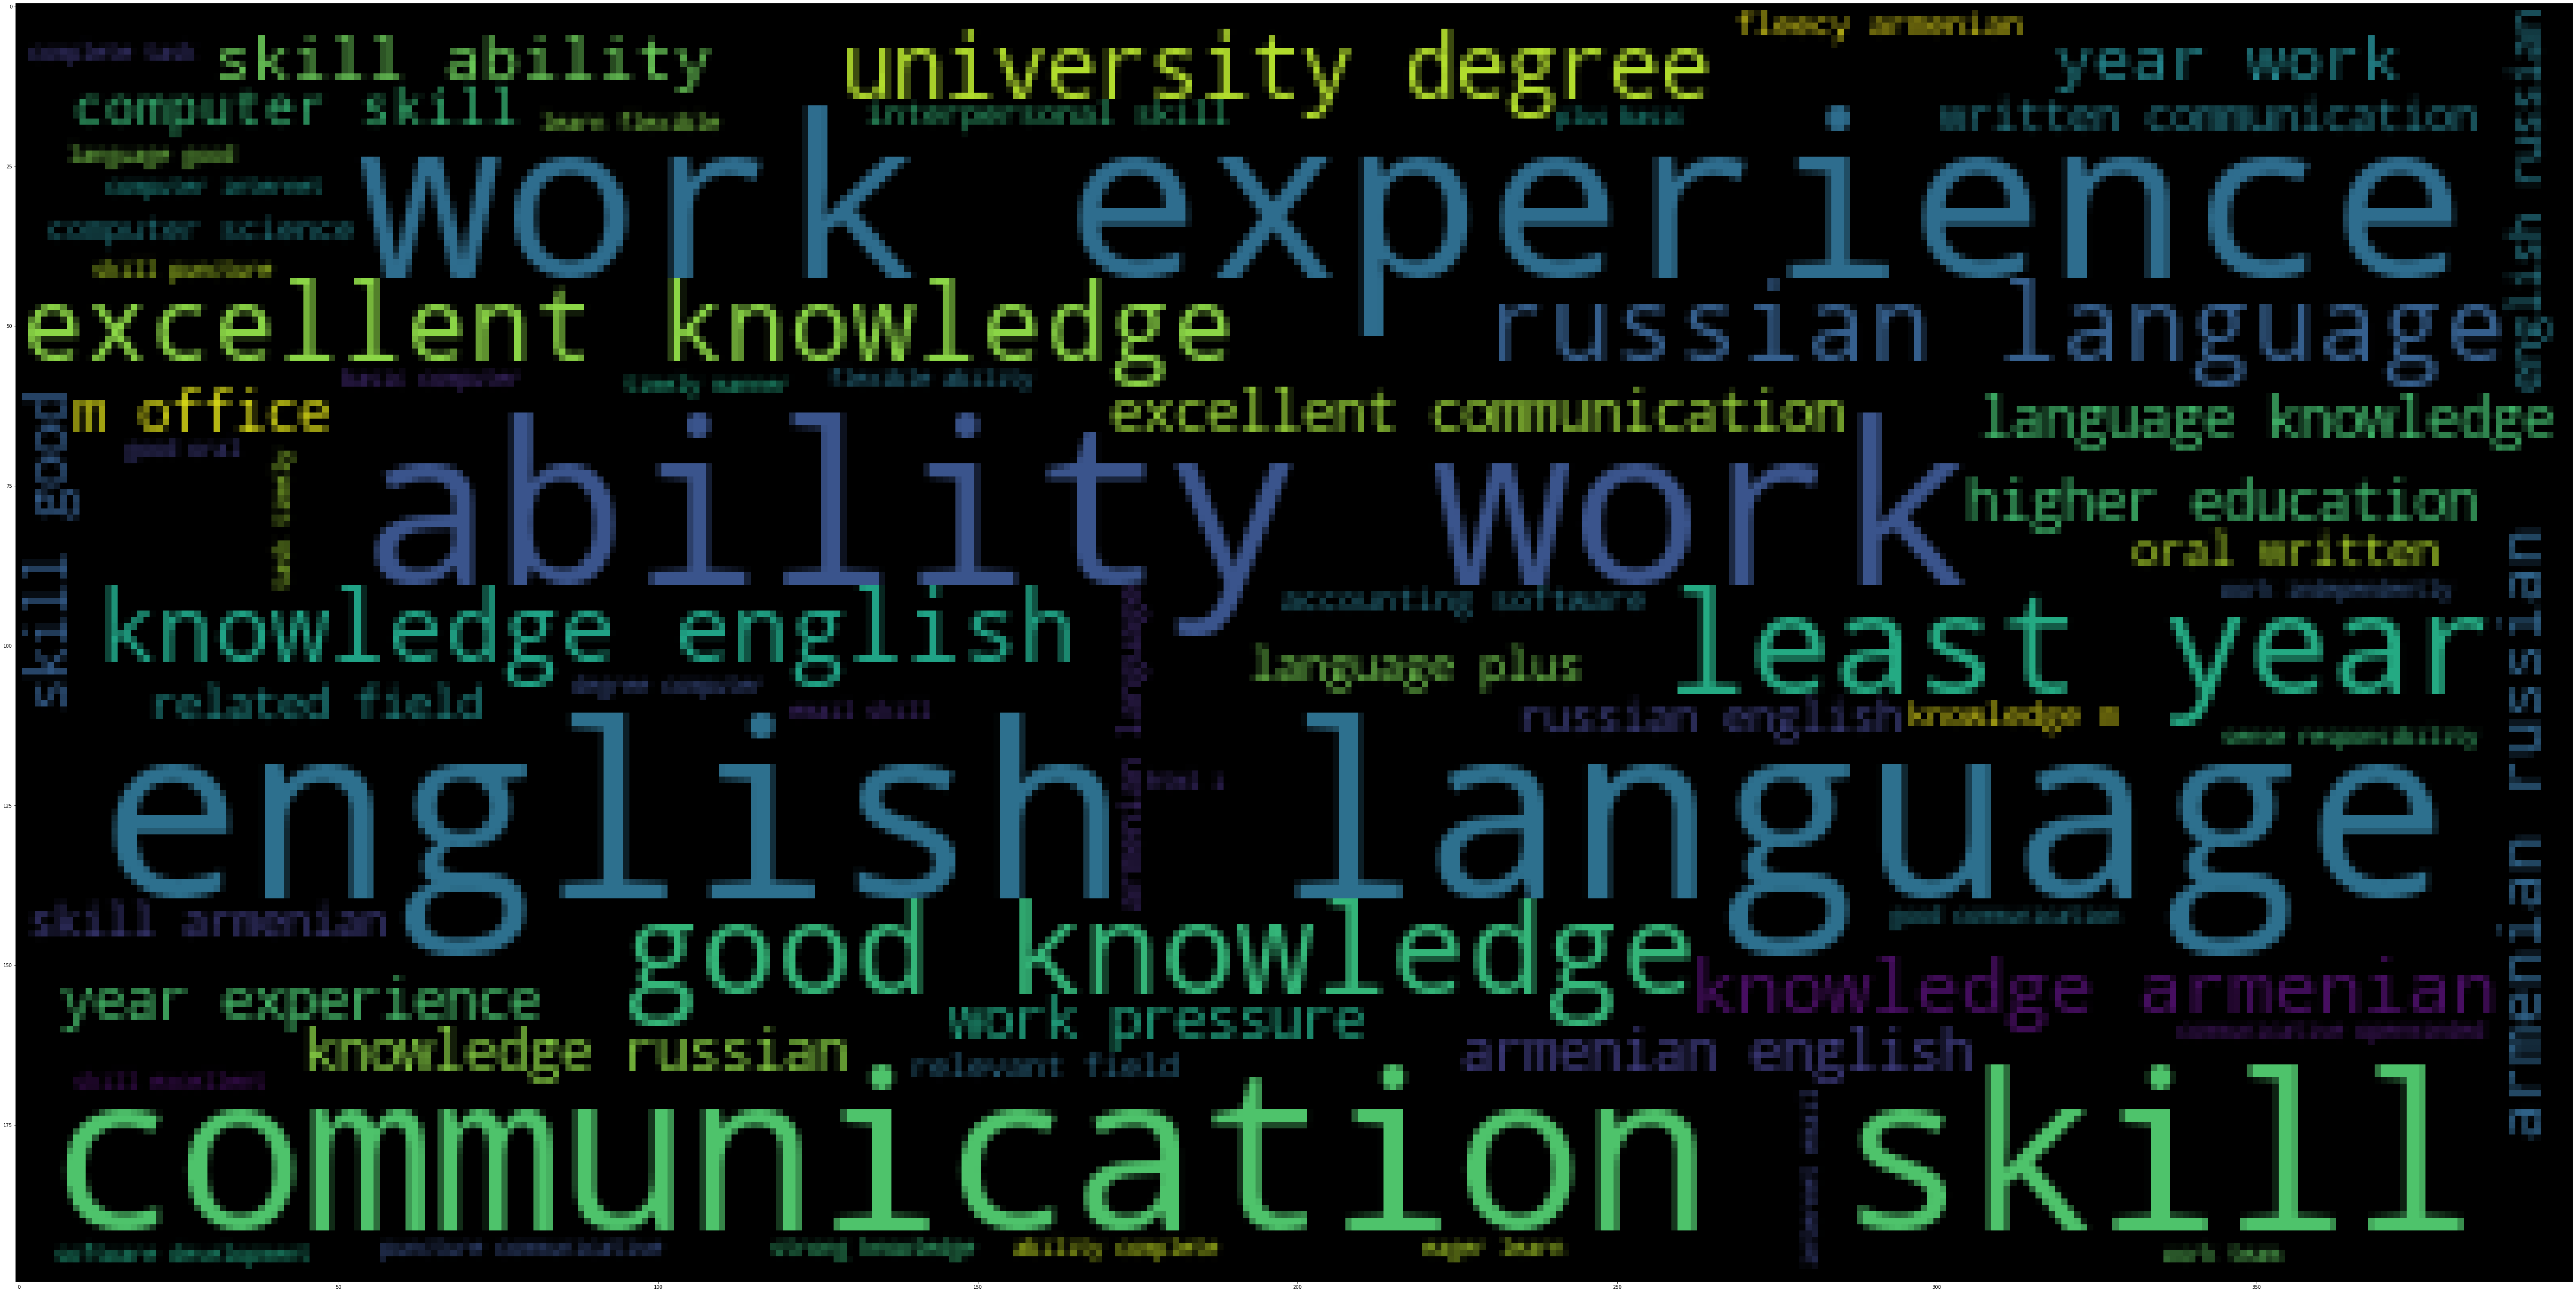

In [122]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

#### Create user defined function for train the models

In [123]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return metrics.accuracy_score(predictions, valid_y)

#### Building different models with different vectors¶

In [124]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB for L1, Count Vectors: ", accuracy_L1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB for L1, Count Vectors:  0.9660574412532638
NB  for L1, WordLevel TF-IDF:  0.9738903394255874
NB  for L1, N-Gram Vectors:  0.8981723237597912
NB for L1, CharLevel Vectors:  0.9399477806788512


In [125]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9556135770234987
LR  for L1, WordLevel TF-IDF:  0.9712793733681462
LR  for L1, N-Gram Vectors:  0.9425587467362925
LR for L1, CharLevel Vectors:  0.9817232375979112


In [126]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.9765013054830287
SVC  for L1, WordLevel TF-IDF:  0.9686684073107049
SVC  for L1, N-Gram Vectors:  0.9608355091383812
SVC for L1, CharLevel Vectors:  0.9869451697127938


In [131]:
#Random Forest
# Random Forest on Count Vectors and TF-IDF
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Random Forest on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Random Forest on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Random Forest on Character Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9686684073107049
LR  for L1, WordLevel TF-IDF:  0.9686684073107049
LR  for L1, N-Gram Vectors:  0.9530026109660574
LR for L1, CharLevel Vectors:  0.9712793733681462


In [132]:
#XGBoosting
# XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(XGBClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

[16:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LR  for L1, Count Vectors:  0.9608355091383812
[16:28:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LR  for L1, WordLevel TF-IDF:  0.9634464751958225
[16:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to

In [133]:
#ANN
# ANN on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

#ANN on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# ANN on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

# ANN on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.97911227154047
LR  for L1, WordLevel TF-IDF:  0.9765013054830287
LR  for L1, N-Gram Vectors:  0.9660574412532638
LR for L1, CharLevel Vectors:  0.9869451697127938


In [134]:
#ANN +logistic
# ANN +logistic on Count Vectors and TF-IDF
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# ANN +logistic on Word Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# ANN +logistic on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# ANN +logistic on Character Level TF IDF Vectors
accuracy_L1 = train_model(MLPClassifier(activation='logistic'), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9765013054830287
LR  for L1, WordLevel TF-IDF:  0.9765013054830287
LR  for L1, N-Gram Vectors:  0.9712793733681462
LR for L1, CharLevel Vectors:  0.9843342036553525


In [135]:
#OneVsRest + XGBoosting
# OneVsRest + XGBoosting on Count Vectors and TF-IDF
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Word Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# OneVsRest + XGBoosting on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# OneVsRest + XGBoosting on Character Level TF IDF Vectors
accuracy_L1 = train_model(OneVsRestClassifier(XGBClassifier()), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

[16:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LR  for L1, Count Vectors:  0.9608355091383812
[16:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LR  for L1, WordLevel TF-IDF:  0.9634464751958225
[16:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to

#### Adding Features to a Document-Term Matrix

In [136]:
# create a DataFrame that only contains the IT=1 and IT=0
job_post = df[(df.IT==0)| (df.IT==1)]

# define X and y
feature_cols = ['RequiredQual','sentiment']
X = df[feature_cols]
y = df.IT

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [137]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1914, 22023)
(638, 22023)


(1914, 1)

In [138]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1914, 3585)
(638, 3585)


(1914, 1)

In [141]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('RequiredQual', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('RequiredQual', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(638, 3586)

In [142]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp

0.987460815047022

In [143]:
# use ANN with all features
mp = MLPClassifier()
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp1

0.9890282131661442

In [144]:
# use Random Forest with text column only
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm, y_train)
y_pred_class = rmf.predict(X_test_dtm,)
acc_rmf=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf

0.9749216300940439

In [145]:
# use Random Forest with all features
rmf = RandomForestClassifier()
rmf.fit(X_train_dtm_extra, y_train)
y_pred_class = rmf.predict(X_test_dtm_extra)
acc_rmf1=metrics.accuracy_score(y_test, y_pred_class)
acc_rmf1

0.9749216300940439

In [146]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
acc_log=metrics.accuracy_score(y_test, y_pred_class)
acc_log

0.9811912225705329

In [147]:
# use logistic regression with text column only
logreg= LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
acc_log1=metrics.accuracy_score(y_test, y_pred_class)
acc_log1

0.9811912225705329

In [148]:
# use Xtreme Boosting with text column only
xgb = XGBClassifier()
xgb.fit(X_train_dtm, y_train)
y_pred_class = xgb.predict(X_test_dtm)
acc_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb

[16:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9858934169278997

In [149]:
# use Xtreme Boosting with text column only
xgb =XGBClassifier()
xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = xgb.predict(X_test_dtm_extra)
acc_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_xgb1

[16:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9827586206896551

In [150]:
# use ANN and logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm, y_train)
y_pred_class = mp.predict(X_test_dtm)
acc_mlp_ln=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln

0.987460815047022

In [151]:
# use ANN and logistic with text column only
mp = MLPClassifier(activation='logistic')
mp.fit(X_train_dtm_extra, y_train)
y_pred_class = mp.predict(X_test_dtm_extra)
acc_mlp_ln1=metrics.accuracy_score(y_test, y_pred_class)
acc_mlp_ln1

0.987460815047022

In [152]:
# use OneVsRest and Boosting with text column only
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm, y_train)
y_pred_class = one_xgb.predict(X_test_dtm)
acc_one_xgb=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb

[16:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9858934169278997

In [153]:
# use OneVsRest and Boosting with all features
one_xgb = OneVsRestClassifier(XGBClassifier())
one_xgb.fit(X_train_dtm_extra, y_train)
y_pred_class = one_xgb.predict(X_test_dtm_extra)
acc_one_xgb1=metrics.accuracy_score(y_test, y_pred_class)
acc_one_xgb1

[16:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9827586206896551

In [154]:
# use SVM with text column only
sm =svm.LinearSVC()
sm.fit(X_train_dtm, y_train)
y_pred_class = sm.predict(X_test_dtm)
acc_svm=metrics.accuracy_score(y_test, y_pred_class)
acc_svm

0.9858934169278997

In [155]:
# use SVM with all features
svm1 = svm.LinearSVC()
svm1.fit(X_train_dtm_extra, y_train)
y_pred_class = svm1.predict(X_test_dtm_extra)
acc_svm1=metrics.accuracy_score(y_test, y_pred_class)
acc_svm1

0.9858934169278997

Text(0.5, 15.0, 'Predicted label')

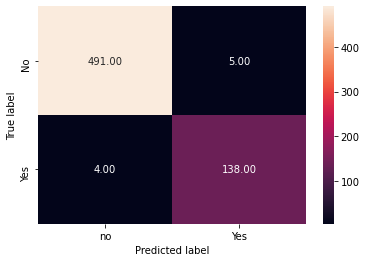

In [156]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [157]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','ANN','ANN + logistic','OneVsRest + XGBoosting','sm'],
    
    'Score': [acc_log,acc_rmf,acc_xgb,acc_mlp,acc_mlp_ln,acc_one_xgb,acc_svm]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,ANN,0.987461
4,ANN + logistic,0.987461
2,XGBoosting,0.985893
5,OneVsRest + XGBoosting,0.985893
6,sm,0.985893
0,Logistic Regression,0.981191
1,Random Forest,0.974922


In [158]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'XGBoosting','ANN','ANN + logistic','OneVsRest + XGBoosting','svm1'],
    
    'Score': [acc_log1,acc_rmf1,acc_xgb1,acc_mlp1,acc_mlp_ln1,acc_one_xgb1,acc_svm1]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,ANN,0.989028
4,ANN + logistic,0.987461
6,svm1,0.985893
2,XGBoosting,0.982759
5,OneVsRest + XGBoosting,0.982759
0,Logistic Regression,0.981191
1,Random Forest,0.974922


#### We got best accuracy by ANN

## Unsupervised Learning

In [159]:
# Data Selection
dff = job_post[['RequiredQual']]

In [160]:
dff['RequiredQual'] = dff['RequiredQual'].astype(str)

#### K-Means Clustering

In [161]:
from nltk.util import ngrams

#### Removal of Punctuations and Conversion to Lower-case

In [162]:
def remove_punctuations(text):
    text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)                # Remove punctuations
    text=text.lower()                                       # Convert text to lower
    return(text)

dff['RequiredQual']=dff['RequiredQual'].apply( lambda x: remove_punctuations(x))
dff['RequiredQual'].head(4)

4     - university degree; economical background is ...
19    as a gd you are creative, innovative and have\...
20    - fluency in spoken and written english; knowl...
21    - university degree in jurisprudence;\n- exper...
Name: RequiredQual, dtype: object

In [163]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(dff['RequiredQual'])

TfidfVectorizer(max_df=0.9, min_df=0.1, ngram_range=(1, 4),
                stop_words='english')

In [164]:
X_train = vectorizer.transform(dff['RequiredQual'])
vocab = vectorizer.get_feature_names()

In [165]:
vocab[:10]

['ability',
 'ability work',
 'ability work pressure',
 'accounting',
 'analytical',
 'applications',
 'armenian',
 'armenian english',
 'armenian english languages',
 'armenian russian']

In [166]:
# get the tf-idf table 
vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(dff['RequiredQual'])

TfidfVectorizer(max_df=0.95, min_df=0.05, ngram_range=(1, 2),
                stop_words='english')

In [167]:
# Create a training data
X_train = vectorizer.transform(dff['RequiredQual'])

In [174]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X_train)

In [175]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 99%


In [176]:
range_n_clusters = list (range(4,11))

In [179]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_lsa)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_lsa, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 4, silhouette score is 0.12245992316854037
For n_clusters = 5, silhouette score is 0.12239968169529408
For n_clusters = 6, silhouette score is 0.12346637276091187
For n_clusters = 7, silhouette score is 0.12280895749956437
For n_clusters = 8, silhouette score is 0.12453762038167261
For n_clusters = 9, silhouette score is 0.1234030586639633
For n_clusters = 10, silhouette score is 0.11887593320266325


#### Best number of clusters are 9 because of highest silhouette score.

In [180]:
# we create a kmeans model
model = KMeans(n_clusters=10, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [181]:
# apply the model on this prepared data
res = model.fit(X_train)
res

KMeans(max_iter=100, n_clusters=10, n_init=1, random_state=5)

In [182]:
# Getting the vocalbulary as well as cluster centers
# Firstly, set of words from the tf-idf itself
vocab = vectorizer.get_feature_names()
vocab = np.array(vocab) 

In [183]:
# Then, the cluster centers from the model fit that we stored on res
cluster_centers = np.array(res.cluster_centers_)

In [184]:
x=np.array((0.1,10,0.05,1.5))
print(x)
print(x.argsort())
res.cluster_centers_[0].argsort()

[ 0.1  10.    0.05  1.5 ]
[2 0 3 1]


array([  0, 137, 138, 139, 140, 143, 148, 149, 151, 152, 155, 156, 157,
       158, 159, 160, 163, 164, 165, 166, 136, 135, 134, 133,  99, 101,
       103, 104, 107, 110, 112, 113, 116, 167, 117, 240, 122, 124, 125,
       126, 127, 128, 129, 132, 118, 168, 171, 172, 212, 213, 214, 215,
       218, 219, 222, 223, 224, 211, 227, 229, 230, 231, 232, 233, 236,
       237, 238, 239, 228,  98, 210, 206, 173, 174, 175, 176, 177, 178,
       179, 184, 185, 207, 186, 190, 191, 193, 195, 197, 199, 200, 203,
       204, 189,  97, 241,  47,  35,  24,  14,  62,  34,  63,   9,   8,
        64,  65,  67,  68,  69,  70,   7,  71,  58,  55,  38,  39,  40,
        42,  43,  44,  13,  45,  12,  11,  10,  51,  52,  54,  46,   6,
        66,  91,  88,  89,  86,  20,   5,  85,  84,  19,  90,  83,  82,
        21,   3,  87,  93,  80,   4,  79,  74,  75,  76,  92,  17,  77,
        41, 220, 221, 205, 102,  18,  96,  59, 181, 146, 183, 201, 225,
       162,  50, 119, 147,  33, 202,  57, 226, 161, 150, 100,  5

In [185]:
# sorting the cluster centers
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [186]:
# get top 10 words from that cluster
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
    print(words)

{'skills punctual', 'plus basic', 'computer internet', 'communicative open', 'mail skills', 'communication skills', 'skills', 'basic computer', 'complete tasks', 'punctual communicative'}
{'knowledge', 'language', 'university degree', 'medical', 'language knowledge', 'skills', 'university', 'basic computer', 'complete tasks', 'russian language', 'communicative open', 'punctual communicative', 'skills punctual', 'plus basic', 'computer internet', 'english language', 'advantage', 'mail skills', 'knowledge english', 'communication skills'}
{'knowledge', 'language', 'strong', 'university degree', 'marketing', 'medical', 'language knowledge', 'skills', 'university', 'basic computer', 'complete tasks', 'russian language', 'experience', 'communicative open', 'punctual communicative', 'ability', 'skills punctual', 'plus basic', 'computer internet', 'english language', 'advantage', 'sales', 'mail skills', 'knowledge english', 'communication skills', 'business', 'excellent', 'work'}
{'knowledge'

In [187]:
words=list(words)

In [188]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [189]:
#train_set[,]
dff.head()

,RequiredQual
4,- university degree; economical background is ...
19,"as a gd you are creative, innovative and have\..."
20,- fluency in spoken and written english; knowl...
21,- university degree in jurisprudence;\n- exper...
29,- university degree in finance or accounting;\...


In [190]:
# how many observations are in each cluster

dff['cluster'] = model.labels_
dff.groupby('cluster').count()

,RequiredQual
cluster,
0,186
1,105
2,155
3,457
4,332
5,273
6,186
7,207
8,353


In [191]:
# what does each cluster look like
dff.head()

,RequiredQual,cluster
4,- university degree; economical background is ...,7
19,"as a gd you are creative, innovative and have\...",5
20,- fluency in spoken and written english; knowl...,4
21,- university degree in jurisprudence;\n- exper...,4
29,- university degree in finance or accounting;\...,3


### Information Extraction

#### Information Extraction to Obtain Company Profile¶

In [205]:
job_post['AboutC']=jobPostingDF['AboutC'].fillna(jobPostingDF['AboutC'].mode().iloc[0])

In [206]:
job_post['AboutC'].head()

4     Mentor Graphics Development Services CJSC is a...
19    Mentor Graphics Development Services CJSC is a...
20    Mentor Graphics Development Services CJSC is a...
21    Mentor Graphics Development Services CJSC is a...
29    Mentor Graphics Development Services CJSC is a...
Name: AboutC, dtype: object

In [1]:
#pip install en_core_web_sm

In [217]:
#nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
nlp = en_core_web_sm.load()
matcher = Matcher(nlp.vocab)

In [218]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [219]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [220]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [221]:
matched_sents=[]
for t in job_post.AboutC:
    if pd.notnull(t) and t != 'NaN':
        t = re.sub(r'\s+', ' ', t)
        doc = nlp(t)
        matches = matcher(doc)
        token_set = []
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            token_set.append(span.text)    
        matched_sents.append(token_set)

In [222]:
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

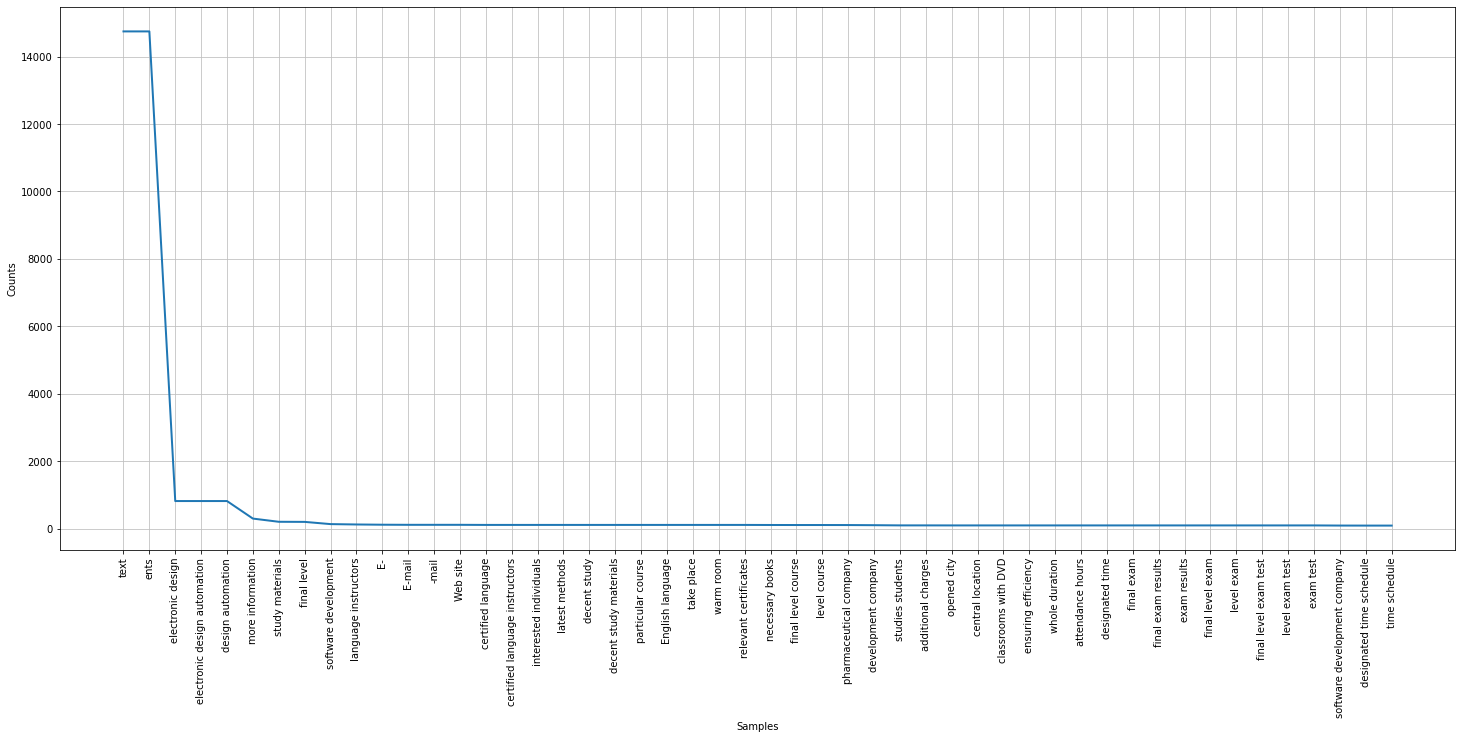

In [223]:
plt.figure(figsize=(25, 10))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)
plt.show()

#### Job Similarity

In [226]:
job_post.head()

,RequiredQual,IT,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment,AboutC
4,- University degree; economical background is ...,1,0,0,0,0,0,0.242857,Mentor Graphics Development Services CJSC is a...
19,"As a GD you are creative, innovative and have\...",1,0,0,0,0,0,0.216970,Mentor Graphics Development Services CJSC is a...
20,- Fluency in spoken and written English; knowl...,0,0,0,0,0,0,0.264394,Mentor Graphics Development Services CJSC is a...
21,- University degree in Jurisprudence;\n- Exper...,0,0,0,0,0,0,0.212245,Mentor Graphics Development Services CJSC is a...
29,- University degree in Finance or Accounting;\...,0,0,0,0,0,0,0.028333,Mentor Graphics Development Services CJSC is a...


In [229]:
df1=jobPostingDF[['jobpost','Title','JobRequirment','JobDescription','RequiredQual']]

#### Using TF-IDF

In [232]:
df1['JobDescription_token'] = df1['JobDescription'].map(word_tokenize)
df1['RequiredQual_token'] = df1['RequiredQual'].map(word_tokenize)
df1['JobRequirment_token'] = df1['JobRequirment'].map(word_tokenize)

In [233]:
tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(df1['Title'])
JobDescription_tfidf = tfidf_model.fit_transform(df1['JobDescription'])
RequiredQual_tfidf = tfidf_model.fit_transform(df1['RequiredQual'])
JobRequirment_tfidf = tfidf_model.fit_transform(df1['JobRequirment'])

In [234]:
def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine +JobDescription_tfidf_cosine+RequiredQual_tfidf_cosine+JobRequirment_tfidf_cosine)/4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

#### Chief Financial Officer Jobs

In [235]:
df1.iloc[0]

jobpost                 AMERIA Investment Consulting Company\nJOB TITL...
Title                                             Chief Financial Officer
JobRequirment           - Supervises financial management and administ...
JobDescription          AMERIA Investment Consulting Company is seekin...
RequiredQual            To perform this job successfully, an\nindividu...
JobDescription_token    [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token      [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token     [-, Supervises, financial, management, and, ad...
Name: 0, dtype: object

In [239]:
for index, score in find_similar_jobs_tfidf(0):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Organization for Implementation of North-South...
Title                                             Chief Financial Officer
JobRequirment           Financial management of the NSRCIP T1 & T2 pro...
JobDescription          The Chief Financial Officer (CFO) will support...
RequiredQual            - Degree in Accounting, Finance, Business, Law...
JobDescription_token    [The, Chief, Financial, Officer, (, CFO, ), wi...
RequiredQual_token      [-, Degree, in, Accounting, ,, Finance, ,, Bus...
JobRequirment_token     [Financial, management, of, the, NSRCIP, T1, &...
Name: 12368, dtype: object
SIMILARITY SCORE:  0.49834474358571085
jobpost                 River Island\nTITLE:  Chief Financial Officer\...
Title                                             Chief Financial Officer
JobRequirment           - Develop tools and systems to provide critica...
JobDescription          River Island is seeking a Chief Financial Offi...
RequiredQual            - Master's degree in M

#### International Research & Exchanges Board Jobs

In [237]:
df1.iloc[1]

jobpost                 International Research & Exchanges Board (IREX...
Title                   Full-time Community Connections Intern (paid i...
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 1, dtype: object

In [238]:
for index, score in find_similar_jobs_tfidf(1):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 International Research & Exchanges Board (IREX...
Title                    Non-paid part or full time Administrative Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication skills;\n- Good oral...
JobDescription_token    [The, incumbent, will, work, under, the, direc...
RequiredQual_token      [-, Excellent, communication, skills, ;, -, Go...
JobRequirment_token     [-, Participate, in, application, design, ;, -...
Name: 11, dtype: object
SIMILARITY SCORE:  0.6798353526927008
jobpost                 International Research & Exchanges Board (IREX...
Title                      Non-paid part or full time Programmatic Intern
JobRequirment           - Participate in application design;\n- Provid...
JobDescription          The incumbent will work under the direct super...
RequiredQual            - Excellent communication 

#### Caucasus Environmental NGO Network job

In [240]:
df1.iloc[2]

jobpost                 Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                 Country Coordinator
JobRequirment           - Working with the Country Director to provide...
JobDescription          Public outreach and strengthening of a growing...
RequiredQual            - Degree in environmentally related field, or ...
JobDescription_token    [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token      [-, Degree, in, environmentally, related, fiel...
JobRequirment_token     [-, Working, with, the, Country, Director, to,...
Name: 2, dtype: object

In [241]:
for index, score in find_similar_jobs_tfidf(2):
    print(df1.iloc[index])
    print("SIMILARITY SCORE: ", score)

jobpost                 Caucasus Environmental NGO Network\nTITLE:  Co...
Title                                       Country Coordinator - Armenia
JobRequirment           -  Write first hand articles, conduct intervie...
JobDescription          CENN - Caucasus Environmental NGO Network - is...
RequiredQual            1. Education: University education in environm...
JobDescription_token    [CENN, -, Caucasus, Environmental, NGO, Networ...
RequiredQual_token      [1, ., Education, :, University, education, in...
JobRequirment_token     [-, Write, first, hand, articles, ,, conduct, ...
Name: 404, dtype: object
SIMILARITY SCORE:  0.4320651188012762
jobpost                 Veya  Ltd.\n\n\nTITLE:  Country Coordinator\n\...
Title                                                 Country Coordinator
JobRequirment           - Negotiate with potential customers;\n- Lobby...
JobDescription          Veya Ltd. is looking for a qualified Country\n...
RequiredQual            - At least 5 years of exp

#### Using Pretrained Word2Vec Embedding

In [243]:
#nlp = spacy.load('en_core_web_lg')

In [244]:
# Original text - Title
doc1 = nlp(df1.iloc[0]['Title'])
doc2 = nlp(df1.iloc[2]['Title'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
Chief Financial Officer 

DOC2:
 Country Coordinator 

 0.6043877580220786


In [246]:
# Original text - RequiredQual
doc1 = nlp(df1.iloc[0]['RequiredQual'])
doc2 = nlp(df1.iloc[2]['RequiredQual'])
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully, an
individual must be able to perform each essential duty satisfactorily.
The requirements listed below are representative of the knowledge,
skill, and/or ability required.
Knowledge of:
- Generally accepted accounting principles;
- Local accounting standards and legislation;
- State reporting requirements pertaining to accounting;
- Principles and practices of financial management and budgeting;
- Principles and practices of financial systems design and analysis;
- Principles and practices of contract management, records management,
and risk management;
- Principles and practices of management and supervision;
- Principles and practices of information systems management.
Ability to:
- Apply sound fiscal and administrative practices to the company's
activities;
- Plan, organize and supervise the work of subordinate employees,
including training them, assigning and evaluating their work, and
providing job performance feedback;
- Critically analyze

In [247]:
# removing stopwords and punctuations
doc1 = nlp(' '.join(df1.iloc[0]['RequiredQual_token']))
doc2 = nlp(' '.join(df1.iloc[2]['RequiredQual_token']))
similarity = doc1.similarity(doc2)
print("DOC1:\n" + doc1.text, "\n\nDOC2:\n", doc2.text, "\n\n", similarity)

DOC1:
To perform this job successfully , an individual must be able to perform each essential duty satisfactorily . The requirements listed below are representative of the knowledge , skill , and/or ability required . Knowledge of : - Generally accepted accounting principles ; - Local accounting standards and legislation ; - State reporting requirements pertaining to accounting ; - Principles and practices of financial management and budgeting ; - Principles and practices of financial systems design and analysis ; - Principles and practices of contract management , records management , and risk management ; - Principles and practices of management and supervision ; - Principles and practices of information systems management . Ability to : - Apply sound fiscal and administrative practices to the company's activities ; - Plan , organize and supervise the work of subordinate employees , including training them , assigning and evaluating their work , and providing job performance feedback

#### POS + RegexMatcher

In [248]:
matcher = Matcher(nlp.vocab)

In [249]:
def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })

In [250]:
patn1 = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn2 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
patn3 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
patn4 = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
patn5 = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
patn6 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
patn7 = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
patn8 = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
patn9 = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
patn10 = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
patn11 = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]

In [251]:
matcher.add('all', collect_sents, patn1, patn2, patn3, patn4, patn5, patn6, patn7, patn8, patn9, patn10, patn11)

In [265]:
type(df1)

pandas.core.frame.DataFrame

In [277]:
# RequiredQual
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', df1.iloc[job1_idx]['RequiredQual'])
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.at[job1_idx, 'RequiredQual_keywords'] = " ".join(keywords)

In [276]:
# JobDescription
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobDescription']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.at[job1_idx, 'JobDescription_keywords'] = " ".join(keywords)

In [278]:
# JobRequirment
for job1_idx in range(df1.shape[0]):
    matched_sents = []
    keywords = []
    t = re.sub(r'\s+', ' ', str(df1.iloc[job1_idx]['JobRequirment']))
    doc = nlp(t)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span
        keywords.append(span.text)
    df1.at[job1_idx, 'JobRequirment_keywords'] = " ".join(keywords)

In [279]:
df1.head()

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,JobDescription_token,RequiredQual_token,JobRequirment_token,JobDescription_keywords,RequiredQual_keywords,JobRequirment_keywords
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...","[AMERIA, Investment, Consulting, Company, is, ...","[To, perform, this, job, successfully, ,, an, ...","[-, Supervises, financial, management, and, ad...",administrative functions complex staff complex...,essential duty accepted accounting accepted ac...,financial management administrative staff assi...
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,- Participate in application design;\n- Provid...,The incumbent will work under the direct super...,- Bachelor's Degree; Master's is preferred;\n-...,"[The, incumbent, will, work, under, the, direc...","[-, Bachelor, 's, Degree, ;, Master, 's, is, p...","[-, Participate, in, application, design, ;, -...",direct supervision front desk,Excellent skills Armenian languages Armenian t...,application design design documentation local ...
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...","[Public, outreach, and, strengthening, of, a, ...","[-, Degree, in, environmentally, related, fiel...","[-, Working, with, the, Country, Director, to,...",Public outreach growing network international ...,related field relevant experience written flue...,environmental information general public elect...
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...","[The, LEAD, (, Local, Enhancement, and, Develo...","[-, Advanced, degree, in, public, health, ,, s...","[-, Identify, gaps, in, knowledge, and, overse...",apply state art approaches address provider ca...,Advanced degree public health social science r...,Identify gaps gaps in knowledge overseeing inf...
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,- Rendering technical assistance to Database M...,The incumbent will work under the direct super...,- University degree; economical background is ...,"[The, incumbent, will, work, under, the, direc...","[-, University, degree, ;, economical, backgro...","[-, Rendering, technical, assistance, to, Data...",direct supervision front desk,economical background Excellent knowledge Netw...,technical assistance servers maintenance serve...


In [280]:
job_dissimilarity_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

In [281]:
for job1_idx in range(3):  # rows
    for job2_idx in range(1000):

        doc1 = nlp(df1.iloc[job1_idx]['Title'])
        doc2 = nlp(df1.iloc[job2_idx]['Title'])
        title_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobDescription_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobDescription_keywords'])
        jd_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['JobRequirment_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['JobRequirment_keywords'])
        jr_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(df1.iloc[job1_idx]['RequiredQual_keywords'])
        doc2 = nlp(df1.iloc[job2_idx]['RequiredQual_keywords'])
        rq_similarity = doc1.similarity(doc2)
        
        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        job_dissimilarity_df = job_dissimilarity_df.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)

In [282]:
# Top similar jobs
job_dissimilarity_df_sorted = job_dissimilarity_df.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
697,0.0,697.0,0.051106
306,0.0,306.0,0.094458
135,0.0,135.0,0.101981
234,0.0,234.0,0.110383
302,0.0,302.0,0.110545
278,0.0,278.0,0.110715
296,0.0,296.0,0.110715
126,0.0,126.0,0.112485
503,0.0,503.0,0.113324


In [283]:
# Show top 5 similar results to job - Ameria Investment Consulting Job
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 0].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)].replace(r'\n',' ', regex=True))

jobpost                    AMERIA Investment Consulting Company JOB TITLE...
Title                                                Chief Financial Officer
JobRequirment              - Supervises financial management and administ...
JobDescription             AMERIA Investment Consulting Company is seekin...
RequiredQual               To perform this job successfully, an individua...
JobDescription_token       [AMERIA, Investment, Consulting, Company, is, ...
RequiredQual_token         [To, perform, this, job, successfully, ,, an, ...
JobRequirment_token        [-, Supervises, financial, management, and, ad...
JobDescription_keywords    administrative functions complex staff complex...
RequiredQual_keywords      essential duty accepted accounting accepted ac...
JobRequirment_keywords     financial management administrative staff assi...
Name: 0, dtype: object
jobpost                    Cascade Capital Holdings CJSC TITLE:  Chief Fi...
Title                                                

In [284]:
# Show top 5 similar results to job - International Research & Exchange Board
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 1].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    International Research & Exchanges Board (IREX...
Title                      Full-time Community Connections Intern (paid i...
JobRequirment              - Participate in application design;\n- Provid...
JobDescription             The incumbent will work under the direct super...
RequiredQual               - Bachelor's Degree; Master's is preferred;\n-...
JobDescription_token       [The, incumbent, will, work, under, the, direc...
RequiredQual_token         [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
JobRequirment_token        [-, Participate, in, application, design, ;, -...
JobDescription_keywords                        direct supervision front desk
RequiredQual_keywords      Excellent skills Armenian languages Armenian t...
JobRequirment_keywords     application design design documentation local ...
Name: 1, dtype: object
jobpost                    International Research & Exchanges Board (IREX...
Title                                 Short-Term Trav

In [285]:
# Show top 5 similar results to job - Caucasus Environmental NGO Network
similar_jobs = job_dissimilarity_df_sorted.loc[job_dissimilarity_df_sorted['index'] == 2].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df1.iloc[int(job)])

jobpost                    Caucasus Environmental NGO Network (CENN)\nJOB...
Title                                                    Country Coordinator
JobRequirment              - Working with the Country Director to provide...
JobDescription             Public outreach and strengthening of a growing...
RequiredQual               - Degree in environmentally related field, or ...
JobDescription_token       [Public, outreach, and, strengthening, of, a, ...
RequiredQual_token         [-, Degree, in, environmentally, related, fiel...
JobRequirment_token        [-, Working, with, the, Country, Director, to,...
JobDescription_keywords    Public outreach growing network international ...
RequiredQual_keywords      related field relevant experience written flue...
JobRequirment_keywords     environmental information general public elect...
Name: 2, dtype: object
jobpost                    Children of Armenia Fund\nTITLE:  Program Coor...
Title                                                